## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

In [2]:
taxi_data = pd.read_csv("data/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
taxi_data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [137]:
# ваш код здесь
# def add_datetime_features(taxi_data):
    taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'])
#     return taxi_data

In [5]:
taxi_data['pickup_datetime'].min()

Timestamp('2016-01-01 00:00:17')

In [6]:
taxi_data['pickup_datetime'].max()

Timestamp('2016-06-30 23:59:39')

In [7]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 122.4+ MB


### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [8]:
# ваш код здесь
taxi_data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

#Пропущенных значений в исходном датасете нет.

### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [9]:
# ваш код здесь
taxi_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [10]:
taxi_data['trip_duration'].max()

3526282

In [11]:
taxi_data.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных? Отвтет: 2

б) Каково максимальное количество пассажиров? Отвтет: 10

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого. Отвтет: Средняя длительность поездки составляет 960 секунд. Медианная длительность поездки составляет 662 секунды. 

г) Чему равно минимальное и максимальное время поездки (в секундах)? Отвтет: Минимальное время поездки 1 секунда. Максимальное время поездки 3526282 секунды.

Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [166]:
# ваш код здесь
def add_datetime_features(taxi_data):
    taxi_data['pickup_date'] = taxi_data['pickup_datetime'].dt.date
    taxi_data['pickup_hour'] = taxi_data['pickup_datetime'].dt.hour
    taxi_data['pickup_day_of_week'] = taxi_data['pickup_datetime'].dt.weekday
    return taxi_data

In [13]:
taxi_data['pickup_day_of_week'].apply(lambda x: x == 5).sum()

220868

In [14]:
count = taxi_data['pickup_date'].nunique()
count

182

In [15]:
agg = taxi_data.groupby(taxi_data['pickup_date'])["trip_duration"].agg(["count"])
agg.mean()

count    8014.527473
dtype: float64

Выводы:
а) Сколько поездок было совершено в субботу? Ответ - 220868 поездок

б) Сколько поездок в среднем совершается в день? Ответ - 8015 поездок в среднем совершается в день.

### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [16]:
holiday_data = pd.read_csv('data/holiday_data.csv', sep=';')

In [17]:
holiday_data.head()

,day,date,holiday
0,Friday,2016-01-01,New Years Day
1,Monday,2016-01-18,Martin Luther King Jr. Day
2,Friday,2016-02-12,Lincoln's Birthday
3,Monday,2016-02-15,Presidents' Day
4,Sunday,2016-05-08,Mother's Day


In [143]:
# ваш код здесь
def add_holiday_features(df1, df2):
    df1.insert (loc= len(df1.columns) , column='holiday_features', value=df1['holiday_features'])
    for i in df1.index:
        if df1['date'] == df2['date']:
            return df1['holiday_features'] == 1
        if df1['date'] != df2['date']:
            return df1['holiday_features'] == 0
    return df1
    

In [19]:
dates = np.array(pd.to_datetime(holiday_data['date']).dt.date)
dates

array([datetime.date(2016, 1, 1), datetime.date(2016, 1, 18),
       datetime.date(2016, 2, 12), datetime.date(2016, 2, 15),
       datetime.date(2016, 5, 8), datetime.date(2016, 5, 30),
       datetime.date(2016, 6, 19), datetime.date(2016, 7, 4),
       datetime.date(2016, 9, 5), datetime.date(2016, 10, 10),
       datetime.date(2016, 11, 11), datetime.date(2016, 11, 24),
       datetime.date(2016, 12, 26), datetime.date(2016, 11, 8)],
      dtype=object)

In [20]:
pickup_date = np.array(taxi_data['pickup_date'])
pickup_date

array([datetime.date(2016, 3, 14), datetime.date(2016, 6, 12),
       datetime.date(2016, 1, 19), ..., datetime.date(2016, 4, 22),
       datetime.date(2016, 1, 5), datetime.date(2016, 4, 5)], dtype=object)

In [21]:
def add_holiday_features(taxi_data):
    taxi_data['holiday_features'] = 0
    for i, taxi_date in enumerate(taxi_data['pickup_date']):
        if taxi_date in dates:
            taxi_data['holiday_features'][i] = 1
    return taxi_data

In [170]:
def add_holiday_features(taxi_data, holiday_data):
    dates = np.array(pd.to_datetime(holiday_data['date']).dt.date)
    taxi_data['holiday_features'] = 0
    for i, taxi_date in enumerate(taxi_data['pickup_date']):
        if taxi_date in dates:
            taxi_data['holiday_features'][i] = 1
    return taxi_data

In [22]:
taxi_data = add_holiday_features(taxi_data)

/var/folders/g6/7y9xp5yn3xsf02lhwc_7bjqc0000gn/T/ipykernel_53734/204282174.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data['holiday_features'][i] = 1


In [23]:
taxi_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,holiday_features
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,2,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,2016-04-08,13,4,0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,2016-01-10,7,6,0
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,2016-04-22,6,4,0
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,2016-01-05,15,1,0


In [24]:
taxi_data[taxi_data['holiday_features'] == 1]['trip_duration'].median()

585.0

Выводы:
1. Чему равна медианная длительность поездки на такси в праздничные дни? Ответ - 585 секунд.

### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [25]:
osrm_data = pd.read_csv('data/osrm_data_train.csv')

In [26]:
def add_osrm_features(taxi_data, osrm_data):
    return taxi_data.join(osrm_data[['id', 'total_distance', 'total_travel_time', 'number_of_steps']].set_index('id'), on='id', how='left')

In [27]:
taxi_data = add_osrm_features(taxi_data, osrm_data)
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,holiday_features,total_distance,total_travel_time,number_of_steps
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0,0,2009.1,164.9,5.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6,0,2513.2,332.0,6.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,1,0,11060.8,767.6,16.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,2,0,1779.4,235.8,4.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,5,0,1614.9,140.1,5.0


In [28]:
osrm_median = round(osrm_data['total_travel_time'].median(), 0)
taxi_median = round(taxi_data['trip_duration'].median(), 0)
taxi_median - osrm_median

372.0

Выводы:
а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? Ответ - 372 секунды.

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц? Ответ - 1.

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [29]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

In [30]:
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,holiday_features,total_distance,total_travel_time,number_of_steps
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0,0,2009.1,164.9,5.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6,0,2513.2,332.0,6.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,1,0,11060.8,767.6,16.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,2,0,1779.4,235.8,4.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,5,0,1614.9,140.1,5.0


In [31]:
def add_geographical_features(taxi_data):
    lat1 = taxi_data['pickup_latitude']
    lng1 = taxi_data['pickup_longitude']
    
    lat2 = taxi_data['dropoff_latitude']
    lng2 = taxi_data['dropoff_longitude']
    
    taxi_data['haversine_distance'] = get_haversine_distance(lat1, lng1, lat2, lng2)
    taxi_data['direction'] = get_angle_direction(lat1, lng1, lat2, lng2)
    return taxi_data

In [32]:
taxi_data = add_geographical_features(taxi_data)
taxi_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,holiday_features,total_distance,total_travel_time,number_of_steps,haversine_distance,direction
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0,0,2009.1,164.9,5.0,1.498521,99.970196
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6,0,2513.2,332.0,6.0,1.805507,-117.153768
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,1,0,11060.8,767.6,16.0,6.385098,-159.680165
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,2,0,1779.4,235.8,4.0,1.485498,-172.737700
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,5,0,1614.9,140.1,5.0,1.188588,179.473585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,2016-04-08,13,4,0,2234.6,311.7,8.0,1.225080,-119.059338
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,2016-01-10,7,6,0,7638.0,589.6,11.0,6.049836,25.342196
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,2016-04-22,6,4,0,9871.5,642.9,10.0,7.824606,-150.788492
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,2016-01-05,15,1,0,1628.3,161.6,7.0,1.092564,35.033294


In [33]:
taxi_data['haversine_distance'].median()

2.0937171329266784

Выводы:
Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых. Ответ - 2,09 км.

### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [34]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

# ваш код здесь

/Users/daniilpereverzev/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [154]:
def add_cluster_features(taxi_data, kmeans):
    coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
    kmeans.fit(coords)
    
    taxi_data['geo_cluster'] = kmeans.labels_
    
    return taxi_data

In [36]:
taxi_data = add_cluster_features(taxi_data, kmeans)

In [37]:
taxi_data.groupby('geo_cluster').agg('count')


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,holiday_features,total_distance,total_travel_time,number_of_steps,haversine_distance,direction
geo_cluster,,,,,,,,,,,,,,,,,,,,
0,596467,596467,596467,596467,596467,596467,596467,596467,596467,596467,596467,596467,596467,596467,596467,596467,596467,596467,596467,596467
1,7233,7233,7233,7233,7233,7233,7233,7233,7233,7233,7233,7233,7233,7233,7233,7232,7232,7232,7233,7233
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,27022,27022,27022,27022,27022,27022,27022,27022,27022,27022,27022,27022,27022,27022,27022,27022,27022,27022,27022,27022
4,359233,359233,359233,359233,359233,359233,359233,359233,359233,359233,359233,359233,359233,359233,359233,359233,359233,359233,359233,359233
5,43619,43619,43619,43619,43619,43619,43619,43619,43619,43619,43619,43619,43619,43619,43619,43619,43619,43619,43619,43619
6,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
7,41171,41171,41171,41171,41171,41171,41171,41171,41171,41171,41171,41171,41171,41171,41171,41171,41171,41171,41171,41171
8,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


Выводы:
Сколько поездок содержится в наименьшем по размеру географическом кластере? Ответ - 2 поездки.

### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [38]:
weather_data = pd.read_csv('data/weather_data.csv')

In [39]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         8787 non-null   object 
 1   temperature  8787 non-null   float64
 2   windchill    2295 non-null   float64
 3   heat index   815 non-null    float64
 4   humidity     8787 non-null   float64
 5   pressure     8556 non-null   float64
 6   dew Point    8787 non-null   float64
 7   visibility   8787 non-null   float64
 8   wind dir     8787 non-null   object 
 9   wind speed   8787 non-null   float64
 10  gust speed   8787 non-null   float64
 11  precip       8787 non-null   float64
 12  events       8787 non-null   object 
 13  conditions   8787 non-null   object 
 14  date         8787 non-null   object 
 15  hour         8787 non-null   int64  
dtypes: float64(10), int64(1), object(5)
memory usage: 1.1+ MB


In [40]:
weather_data.head()

,time,temperature,windchill,heat index,humidity,pressure,dew Point,visibility,wind dir,wind speed,gust speed,precip,events,conditions,date,hour
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,None,Overcast,2015-12-31,2
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,None,Overcast,2015-12-31,3
2,2015-12-31 04:00:00,7.2,NaN,NaN,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,None,Overcast,2015-12-31,4
3,2015-12-31 05:00:00,7.2,5.9,NaN,0.86,1015.9,5.0,14.5,NW,7.4,0.0,0.0,None,Overcast,2015-12-31,5
4,2015-12-31 06:00:00,7.2,6.4,NaN,0.90,1016.2,5.6,11.3,West,5.6,0.0,0.0,None,Overcast,2015-12-31,6


In [41]:
weather_data['time'] = pd.to_datetime(weather_data['time'])

In [42]:
weather_data['date'] = pd.to_datetime(weather_data['time']).dt.date
weather_data['hour'] = pd.to_datetime(weather_data['time']).dt.hour

In [171]:
# ваш код здесь
def add_weather_features(taxi_data, weather_data):
    # new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])
    return taxi_data.merge(weather_data, how='left', left_on=['pickup_date', 'pickup_hour'], right_on=['date', 'hour'])
    # return taxi_data.join(weather_data[['date', 'hour','temperature', 'visibility', 'wind speed', 'precip', 'events']], id='date', how='left')

In [44]:
taxi_data = add_weather_features(taxi_data, weather_data)

In [45]:
taxi_data[taxi_data['events'] == 'Snow']

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dew Point,visibility,wind dir,wind speed,gust speed,precip,events,conditions,date,hour
75,id0959273,1,2016-03-20 23:16:39,2016-03-20 23:27:26,1,-73.988838,40.768902,-73.955536,40.771744,N,...,-1.7,2.4,NE,14.8,0.0,0.0,Snow,Light Snow,2016-03-20,23.0
190,id1674373,2,2016-02-15 17:52:27,2016-02-15 18:02:13,5,-74.007500,40.740952,-74.016647,40.704910,N,...,-6.1,0.8,Variable,7.4,0.0,0.8,Snow,Snow,2016-02-15,17.0
210,id2677357,2,2016-02-15 16:36:19,2016-02-15 16:41:50,2,-73.971634,40.781963,-73.981689,40.778996,N,...,-7.8,0.8,ENE,13.0,0.0,0.0,Snow,Snow,2016-02-15,16.0
310,id1027675,2,2016-01-23 08:46:42,2016-01-23 09:06:39,1,-73.969536,40.755219,-73.976524,40.747948,N,...,-6.1,0.4,NE,33.3,55.6,3.8,Snow,Snow,2016-01-23,8.0
328,id2640178,1,2016-02-15 16:12:24,2016-02-15 16:31:27,1,-73.953979,40.763859,-73.996437,40.715511,N,...,-7.8,0.8,ENE,13.0,0.0,0.0,Snow,Snow,2016-02-15,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458447,id1276271,1,2016-02-08 13:17:29,2016-02-08 13:27:34,1,-73.983467,40.755779,-73.992310,40.752625,N,...,-2.8,0.8,North,22.2,31.5,0.8,Snow,Snow,2016-02-08,13.0
1458480,id1250471,1,2016-03-04 12:21:19,2016-03-04 12:37:49,1,-73.972527,40.758957,-73.956093,40.785572,N,...,-3.9,1.2,NE,18.5,31.5,0.3,Snow,Light Snow,2016-03-04,12.0
1458494,id0329232,2,2016-02-05 09:01:15,2016-02-05 09:06:13,1,-74.008911,40.715923,-74.004562,40.712826,N,...,-1.7,1.2,NE,22.2,33.3,2.3,Snow,Light Snow,2016-02-05,9.0
1458538,id1302341,1,2016-02-15 19:21:09,2016-02-15 19:46:40,1,-73.973053,40.793495,-73.872581,40.774479,N,...,-3.9,1.2,Variable,11.1,0.0,1.3,Snow,Light Snow,2016-02-15,19.0


In [46]:
snow_event = taxi_data['events'].isna().sum()
snow_event

12032

In [47]:
non_null_per = 12032 / 1458644 * 100
round(non_null_per, 2)

0.82

Выводы:
а) Сколько поездок было совершено в снежную погоду? Ответ - 12032 поездки.

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ - 0,82%.

### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [48]:
# До применения
print(taxi_data['temperature'].isna().sum())
print(taxi_data['visibility'].isna().sum())
print(taxi_data['wind speed'].isna().sum())
print(taxi_data['precip'].isna().sum())
print(taxi_data['events'].isna().sum())
print(taxi_data['total_distance'].isna().sum())
print(taxi_data['total_travel_time'].isna().sum())
print(taxi_data['number_of_steps'].isna().sum())

12032
12032
12032
12032
12032
1
1
1


In [49]:
def fill_null_weather_data(taxi_data):
    # Нахождение медианы для столбцов
    median_temperature = taxi_data.groupby('pickup_date')['temperature'].transform('median')
    median_visibility = taxi_data.groupby('pickup_date')['visibility'].transform('median')
    median_wind_speed = taxi_data.groupby('pickup_date')['wind speed'].transform('median')
    median_precip = taxi_data.groupby('pickup_date')['precip'].transform('median')
    # Присвоение медианы пустым значениям по столбцам
    taxi_data['temperature'] = taxi_data['temperature'].fillna(median_temperature)
    taxi_data['visibility'] = taxi_data['visibility'].fillna(median_visibility)    
    taxi_data['wind speed'] = taxi_data['wind speed'].fillna(median_wind_speed)    
    taxi_data['precip'] = taxi_data['precip'].fillna(median_precip) 
    
    # Заполнение пустых значений погодных явлений None
    taxi_data['events'] = taxi_data['events'].fillna('None')
    
    # Нахождение медианы для столбцов из OSRM API
    median_total_distance = taxi_data.groupby('pickup_date')['total_distance'].transform('median')
    median_total_travel_time = taxi_data.groupby('pickup_date')['total_travel_time'].transform('median')
    median_number_of_steps = taxi_data.groupby('pickup_date')['number_of_steps'].transform('median')
    # Присвоение медианы пустым значениям по столбцам из OSRM API
    taxi_data['total_distance'] = taxi_data['total_distance'].fillna(median_total_distance)    
    taxi_data['total_travel_time'] = taxi_data['total_travel_time'].fillna(median_wind_speed)    
    taxi_data['number_of_steps'] = taxi_data['number_of_steps'].fillna(median_number_of_steps) 

    return taxi_data

In [50]:
taxi_data = fill_null_weather_data(taxi_data)

In [51]:
# После применения
print(taxi_data['temperature'].isna().sum())
print(taxi_data['visibility'].isna().sum())
print(taxi_data['wind speed'].isna().sum())
print(taxi_data['precip'].isna().sum())
print(taxi_data['events'].isna().sum())
print(taxi_data['total_distance'].isna().sum())
print(taxi_data['total_travel_time'].isna().sum())
print(taxi_data['number_of_steps'].isna().sum())

0
0
0
0
0
0
0
0


In [52]:
taxi_data['temperature'].median()

11.1

В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


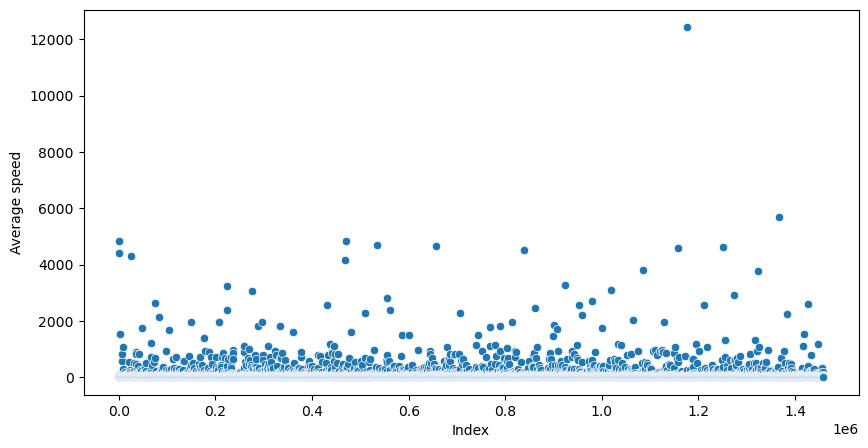

In [53]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [54]:
# ваш код здесь
out_trip = taxi_data[taxi_data['trip_duration'] > 24 * 60 * 60].index
out_speed = taxi_data[taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6 > 300].index

In [55]:
taxi_data = taxi_data.drop(out_trip)
taxi_data = taxi_data.drop(out_speed)

In [56]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458233 entries, 0 to 1458643
Data columns (total 37 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458233 non-null  object        
 1   vendor_id           1458233 non-null  int64         
 2   pickup_datetime     1458233 non-null  datetime64[ns]
 3   dropoff_datetime    1458233 non-null  object        
 4   passenger_count     1458233 non-null  int64         
 5   pickup_longitude    1458233 non-null  float64       
 6   pickup_latitude     1458233 non-null  float64       
 7   dropoff_longitude   1458233 non-null  float64       
 8   dropoff_latitude    1458233 non-null  float64       
 9   store_and_fwd_flag  1458233 non-null  object        
 10  trip_duration       1458233 non-null  int64         
 11  pickup_date         1458233 non-null  object        
 12  pickup_hour         1458233 non-null  int64         
 13  pickup_day_o

Выводы:
а) Сколько выбросов по признаку длительности поездки вам удалось найти? Ответ - 4 поездки.

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти? Ответ - 407 поездок.

## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [57]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

Text(0.5, 1.0, 'Распределение длительности поездок')

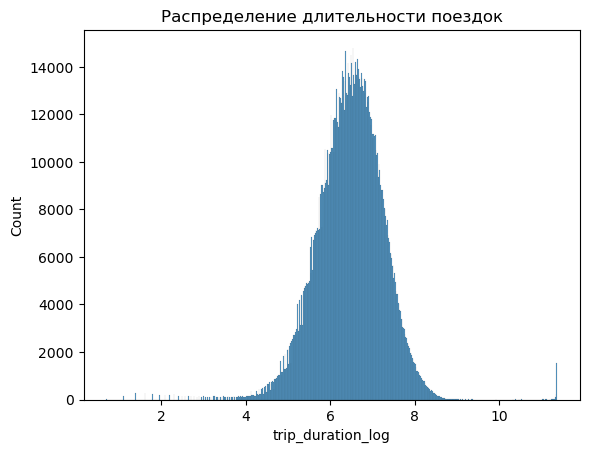

In [58]:
# ваш код здесь
sns.histplot(data=taxi_data['trip_duration_log']).set_title("Распределение длительности поездок")


In [59]:
from scipy import stats

x = taxi_data['trip_duration_log']
k2, p = stats.normaltest(x)
alpha = 0.05
print("p = {:g}".format(p))

if p < alpha:  #Нулевая гипотеза: Распределение нормальное
    print("Нулевая гипотеза отвергнута")
else:
    print("Нулевая гипотеза не может быть отвергнута")

p = 0
Нулевая гипотеза отвергнута


Выводы:
а) Чему равен вычисленный p-value? Ответ округлите до сотых. Ответ - 0,00.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным? Ответ - распределение не является нормальным.

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

In [60]:
# ваш код здесь
# распределяем длительность поездок по таксопаркам
tdl_vendor_1 = taxi_data[taxi_data['vendor_id'] == 1]
tdl_vendor_2 = taxi_data[taxi_data['vendor_id'] == 2]


Text(0.5, 1.0, 'Распределение длительности поездок по таксопарку 1')

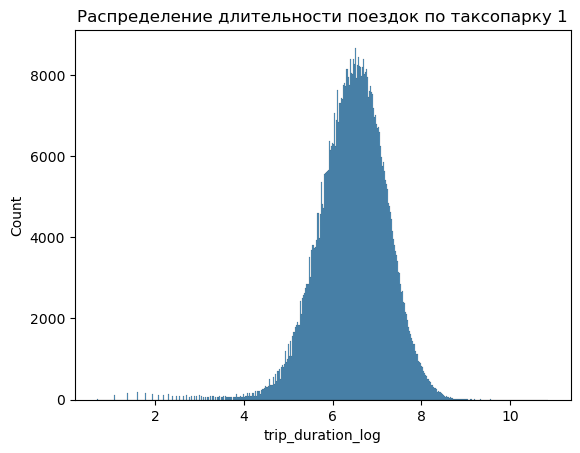

In [61]:
sns.histplot(data=tdl_vendor_1['trip_duration_log']).set_title("Распределение длительности поездок по таксопарку 1")

In [62]:
# Проверяем гипотезу о нормальном распределении для таксопарка №1
x = tdl_vendor_1['trip_duration_log']
k2, p = stats.normaltest(x)
alpha = 0.05
print("p = {:g}".format(p))

if p < alpha:  #Нулевая гипотеза: Распределение нормальное
    print("Нулевая гипотеза отвергнута")
else:
    print("Нулевая гипотеза не может быть отвергнута")

p = 0
Нулевая гипотеза отвергнута


Text(0.5, 1.0, 'Распределение длительности поездок по таксопарку 2')

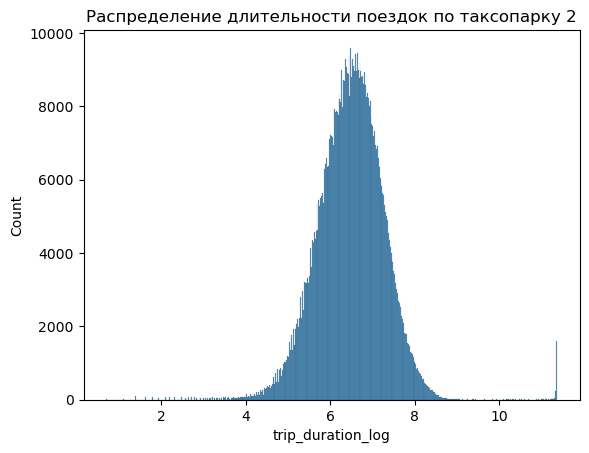

In [63]:
sns.histplot(data=tdl_vendor_2['trip_duration_log']).set_title("Распределение длительности поездок по таксопарку 2")

In [64]:
# Проверяем гипотезу о нормальном распределении для таксопарка №2
x = tdl_vendor_2['trip_duration_log']
k2, p = stats.normaltest(x)
alpha = 0.05
print("p = {:g}".format(p))

if p < alpha:  #Нулевая гипотеза: Распределение нормальное
    print("Нулевая гипотеза отвергнута")
else:
    print("Нулевая гипотеза не может быть отвергнута")

p = 0
Нулевая гипотеза отвергнута


Выводы:
Сравните два распределения между собой. Ответ - распределение длительности поездок в таксопарках №1 и №2 не имеют нормального распределения.

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

In [65]:
taxi_data['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

In [66]:
# ваш код здесь
# распределяем длительность поездок по признакам отправки сообщения поставщику
tdl_flag_no = taxi_data[taxi_data['store_and_fwd_flag'] == 'N']
tdl_flag_yes = taxi_data[taxi_data['store_and_fwd_flag'] == 'Y']


Text(0.5, 1.0, 'Распределение длительности поездок по признаку отсутствия отправки сообщения поставщику')

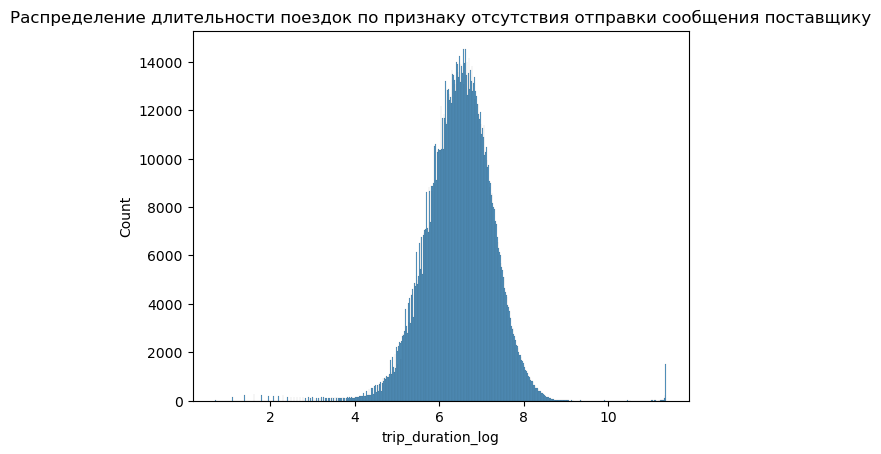

In [67]:
# Строим гистограмму распределения длительности поездок по признаку отсутствия отправки сообщения поставщику
sns.histplot(data=tdl_flag_no['trip_duration_log']).set_title("Распределение длительности поездок по признаку отсутствия отправки сообщения поставщику")

Text(0.5, 1.0, 'Распределение длительности поездок по признаку отправки сообщения поставщику')

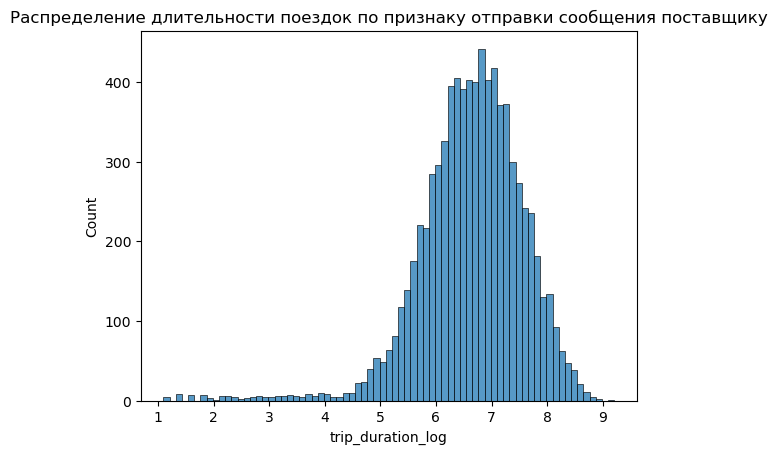

In [68]:
# Строим гистограмму распределения длительности поездок по признаку отправки сообщения поставщику
sns.histplot(data=tdl_flag_yes['trip_duration_log']).set_title("Распределение длительности поездок по признаку отправки сообщения поставщику")

Выводы:
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой. Ответ: наиболее длительные поездки принадлежат к группе N. Таким образом, флаг сохраняется только для кратковременных поездок, а для аномальных многочасовых — не сохраняется.

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

In [69]:
# ваш код здесь
tdl_hour_0_5 = taxi_data[(taxi_data['hour'] >= 0) & (taxi_data['hour'] <= 5)]
tdl_hour_6_12 = taxi_data[(taxi_data['hour'] >= 6) & (taxi_data['hour'] <= 12)]
tdl_hour_13_18 = taxi_data[(taxi_data['hour'] >= 13) & (taxi_data['hour'] <= 18)]
tdl_hour_18_23 = taxi_data[(taxi_data['hour'] >= 18) & (taxi_data['hour'] <= 23)]

<Axes: xlabel='hour', ylabel='Count'>

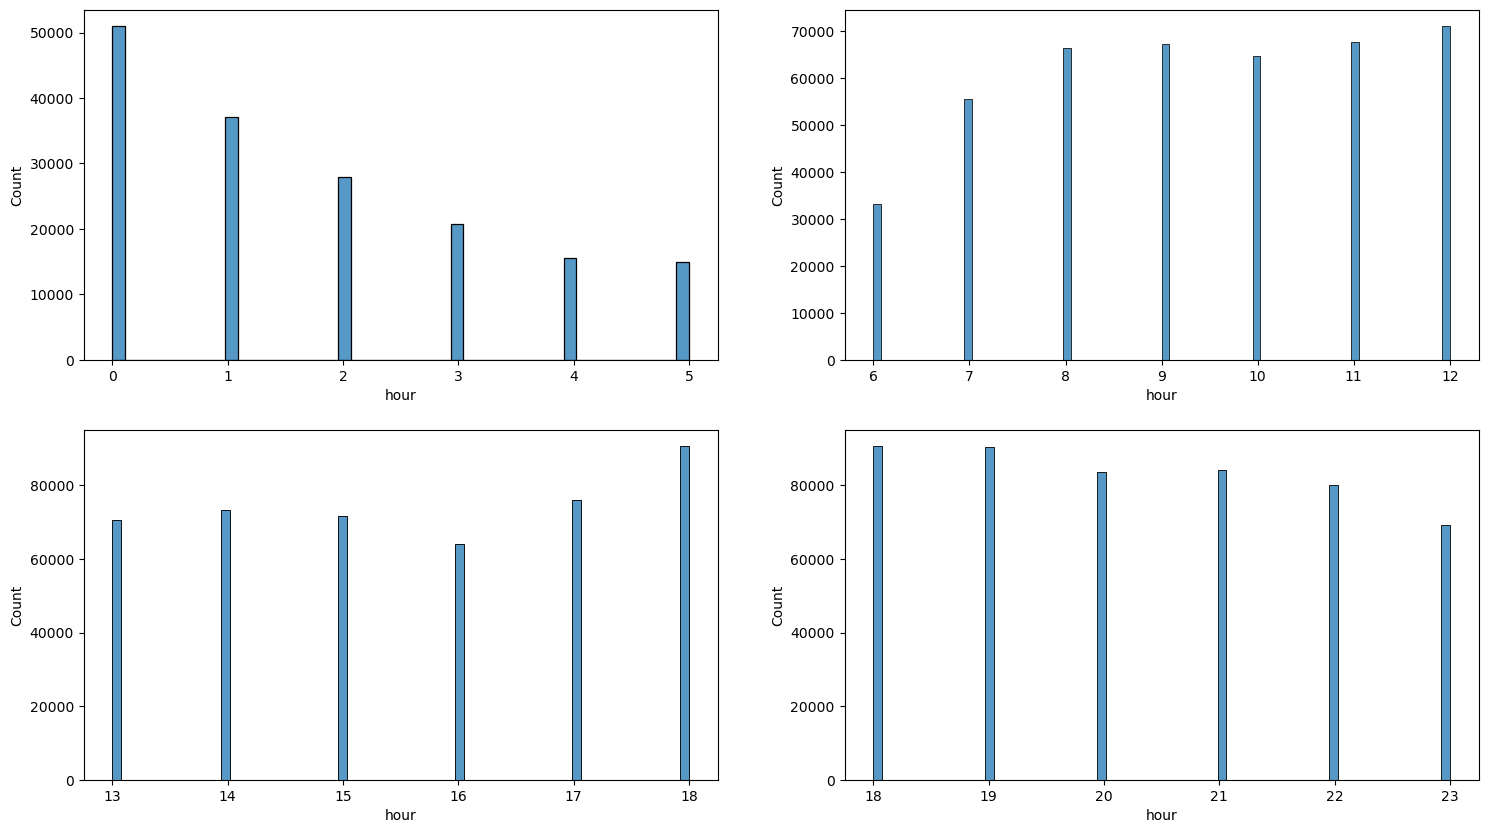

In [70]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
 
sns.histplot(ax=axes[0, 0], data=tdl_hour_0_5, x='hour')
sns.histplot(ax=axes[0, 1], data=tdl_hour_6_12, x='hour')
sns.histplot(ax=axes[1, 0], data=tdl_hour_13_18, x='hour')
sns.histplot(ax=axes[1, 1], data=tdl_hour_18_23, x='hour')

In [71]:
print("Поездок с 0 до 5 часов =", len(tdl_hour_0_5))
print("Поездок с 6 до 12 часов =", len(tdl_hour_6_12))
print("Поездок с 13 до 18 часов =", len(tdl_hour_13_18))
print("Поездок с 18 до 23 часов =", len(tdl_hour_18_23))

Поездок с 0 до 5 часов = 167205
Поездок с 6 до 12 часов = 425549
Поездок с 13 до 18 часов = 446397
Поездок с 18 до 23 часов = 497637


Text(0.5, 1.0, 'Распределение длительности поездок в зависимости от часа дня')

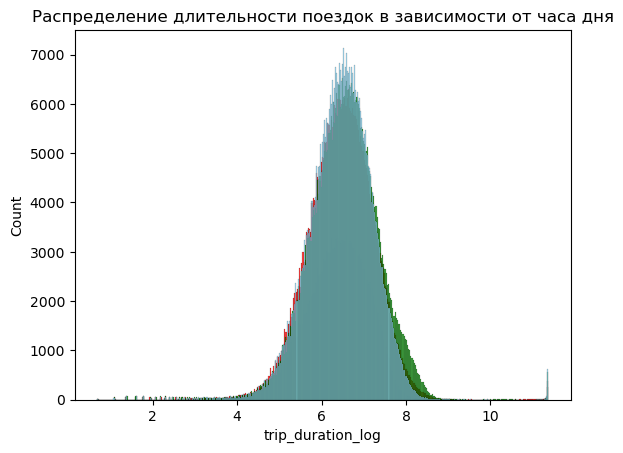

In [72]:
# Графики перекрывают друг друга из-за чего ничего не видно
fig, ax = plt.subplots()
sns.histplot(tdl_hour_0_5['trip_duration_log'], color = "gray", multiple='layer').set_title("Распределение длительности поездок в зависимости от часа дня")
sns.histplot(tdl_hour_6_12['trip_duration_log'], color = "red", multiple='layer').set_title("Распределение длительности поездок в зависимости от часа дня")
sns.histplot(tdl_hour_13_18['trip_duration_log'], color = "green", multiple='layer').set_title("Распределение длительности поездок в зависимости от часа дня")
sns.histplot(tdl_hour_18_23['trip_duration_log'], color = "skyblue", multiple='layer').set_title("Распределение длительности поездок в зависимости от часа дня")

Text(0.5, 1.0, 'Пики медианной длительности поездок')

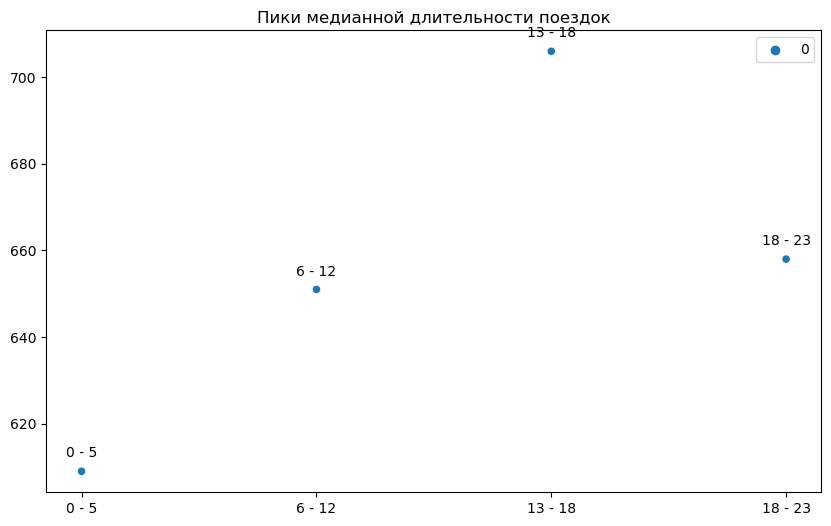

In [73]:
# Находим пики медианной длительности поездок
tdl_hour_0_5_median_peak = tdl_hour_0_5['trip_duration'].median()
tdl_hour_6_12_median_peak = tdl_hour_6_12['trip_duration'].median()
tdl_hour_13_18_median_peak = tdl_hour_13_18['trip_duration'].median()
tdl_hour_18_23_median_peak = tdl_hour_18_23['trip_duration'].median()
# Добавляем их в массив
peaks = np.array([
    tdl_hour_0_5_median_peak, 
    tdl_hour_6_12_median_peak,
    tdl_hour_13_18_median_peak,
    tdl_hour_18_23_median_peak
])
# Добавляем названия для точек пиков 
peaks_names = np.array([
    '0 - 5',
    '6 - 12',
    '13 - 18',
    '18 - 23',
])
# Создаём DataFrame на основе этих данных
df = pd.DataFrame(peaks, index=peaks_names)
# Отображаем его
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(df)

# Добавляем название рядом с каждой точкой
for i, txt in enumerate(df.index):
    ax.annotate(txt, (i, df[0][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Пики медианной длительности поездок')

In [74]:
df

,0
0 - 5,609.0
6 - 12,651.0
13 - 18,706.0
18 - 23,658.0


Выводы:
а) В какое время суток такси заказывают реже всего? Ответ - в период с 0 до 5 часов.

б) В какое время суток наблюдается пик медианной длительности поездок? Ответ - в период с 13 до 18 часов.

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


In [75]:
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,visibility,wind dir,wind speed,gust speed,precip,events,conditions,date,hour,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,8.0,ENE,27.8,57.4,0.3,None,Overcast,2016-03-14,17.0,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,16.1,West,7.4,0.0,0.0,None,Unknown,2016-06-12,0.0,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.1,West,24.1,46.3,0.0,None,Clear,2016-01-19,11.0,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,16.1,South,25.9,35.2,0.0,None,Clear,2016-04-06,19.0,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,16.1,Variable,9.3,0.0,0.0,None,Clear,2016-03-26,13.0,6.077642


In [76]:
# ваш код здесь
# Делаем выборки по дням недеи
tdl_monday = taxi_data[taxi_data['pickup_day_of_week'] == 0]
tdl_tuesday = taxi_data[taxi_data['pickup_day_of_week'] == 1]
tdl_wednesday = taxi_data[taxi_data['pickup_day_of_week'] == 2]
tdl_thursday = taxi_data[taxi_data['pickup_day_of_week'] == 3]
tdl_friday = taxi_data[taxi_data['pickup_day_of_week'] == 4]
tdl_saturday = taxi_data[taxi_data['pickup_day_of_week'] == 5]
tdl_sunday = taxi_data[taxi_data['pickup_day_of_week'] == 6]

In [77]:
# Выводим количество поездок по дням недели
print("Поездок в понедельник =", len(tdl_monday))
print("Поездок во вторник =", len(tdl_tuesday))
print("Поездок в среду =", len(tdl_wednesday))
print("Поездок в четверг =", len(tdl_thursday))
print("Поездок в пятницу =", len(tdl_friday))
print("Поездок в субботу =", len(tdl_saturday))
print("Поездок в воскресенье =", len(tdl_sunday))

Поездок в понедельник = 187357
Поездок во вторник = 202696
Поездок в среду = 210094
Поездок в четверг = 218497
Поездок в пятницу = 223484
Поездок в субботу = 220805
Поездок в воскресенье = 195300


Text(0.5, 1.0, 'Пики медианной длительности поездок')

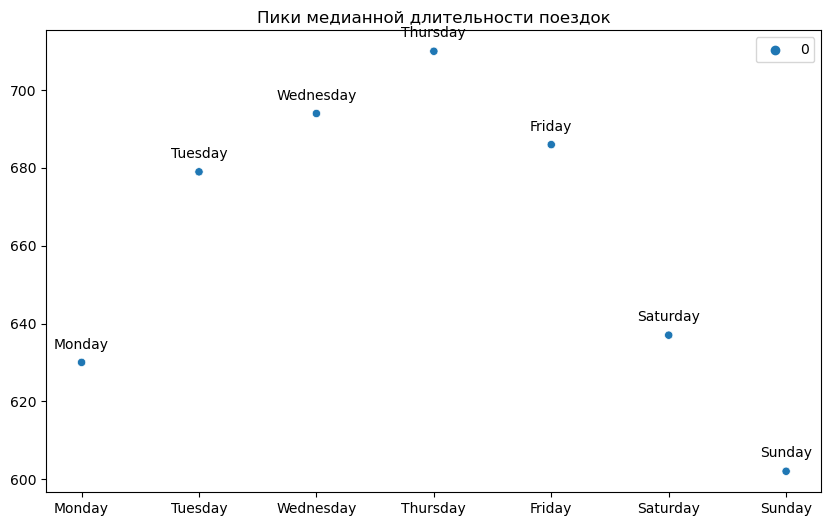

In [78]:
# Находим пики медианной длительности поездок
tdl_monday_median_peak = tdl_monday['trip_duration'].median()
tdl_tuesday_median_peak = tdl_tuesday['trip_duration'].median()
tdl_wednesday_median_peak = tdl_wednesday['trip_duration'].median()
tdl_thursday_median_peak = tdl_thursday['trip_duration'].median()
tdl_friday_median_peak = tdl_friday['trip_duration'].median()
tdl_saturday_median_peak = tdl_saturday['trip_duration'].median()
tdl_sunday_median_peak = tdl_sunday['trip_duration'].median()
# Добавляем их в массив
peaks = np.array([
    tdl_monday_median_peak, 
    tdl_tuesday_median_peak,
    tdl_wednesday_median_peak,
    tdl_thursday_median_peak,
    tdl_friday_median_peak,
    tdl_saturday_median_peak,
    tdl_sunday_median_peak
])
# Добавляем названия для точек пиков 
peaks_names = np.array([
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
])
# Создаём DataFrame на основе этих данных
df = pd.DataFrame(peaks, index=peaks_names)
# Отображаем его
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(df)

# Добавляем название рядом с каждой точкой
for i, txt in enumerate(df.index):
    ax.annotate(txt, (i, df[0][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Пики медианной длительности поездок')

Выводы:
а) В какой день недели совершается больше всего поездок? Ответ - в пятницу.
б) В какой день недели медианная длительность поездок наименьшая? Ответ - в воскресенье.

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

<Axes: xlabel='pickup_day_of_week', ylabel='pickup_hour'>

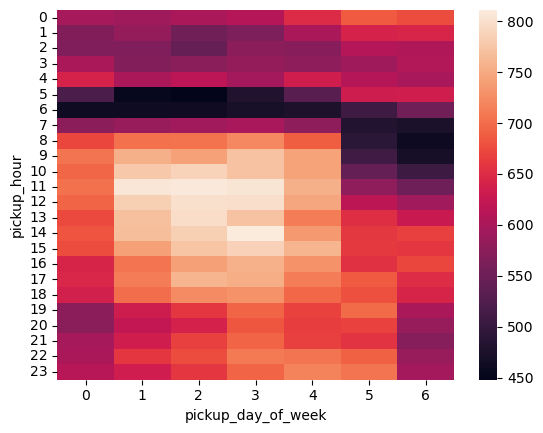

In [79]:
# ваш код здесь
pivot_table = pd.pivot_table(taxi_data,
               index="pickup_hour",
               columns="pickup_day_of_week",
               values="trip_duration",
               aggfunc=np.median)

sns.heatmap(pivot_table)

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


In [80]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

In [81]:
limited_pickup_taxi_data = taxi_data[
    (taxi_data['pickup_longitude'] > city_long_border[0])
    & 
    (taxi_data['pickup_longitude'] < city_long_border[1])
    &
    (taxi_data['pickup_latitude'] > city_lat_border[0])
    &
    (taxi_data['pickup_latitude'] < city_lat_border[1])
]

In [82]:
# sns.scatterplot(data=limited_pickup_taxi_data, x='pickup_longitude', y='pickup_latitude', s=6, hue='geo_cluster')

In [83]:
limited_dropoff_taxi_data = taxi_data[
    (taxi_data['dropoff_longitude'] > city_long_border[0])
    & 
    (taxi_data['dropoff_longitude'] < city_long_border[1])
    &
    (taxi_data['dropoff_latitude'] > city_lat_border[0])
    &
    (taxi_data['dropoff_latitude'] < city_lat_border[1])
]

In [84]:
# sns.scatterplot(data=limited_dropoff_taxi_data, x='dropoff_longitude', y='dropoff_latitude', s=6, hue='geo_cluster')

In [85]:
#taxi_data['geo_cluster'].nunique() - limited_dropoff_taxi_data['geo_cluster'].nunique()
taxi_data['geo_cluster'].nunique() - limited_pickup_taxi_data['geo_cluster'].nunique()


2

Выводы:
Сколько кластеров (из десяти) не попало на диаграммы (находятся за границами Нью-Йорка)? Ответ - 2 кластера.

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [86]:
taxi_data = taxi_data.drop(['time','windchill','heat index','humidity','pressure','dew Point','wind dir','gust speed','conditions','date','hour'], axis=1)
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,6.077642


In [87]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'holiday_features', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [88]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [89]:
# ваш код здесь
# Удаляем неинформативные колонки
drop_columns = ['id', 'dropoff_datetime']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 25)


Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [90]:
# Удаляем колонки
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.
Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 1, если идентификатор таксопарка равен 0, и 1 в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение "N", и 0 в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [91]:
train_data['vendor_id'].describe()

count    1.458233e+06
mean     1.534975e+00
std      4.987754e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      2.000000e+00
Name: vendor_id, dtype: float64

In [92]:
# ваш код здесь
# Кодируем столбец
train_data['vendor_id'] = train_data['vendor_id'].apply(lambda x: x==0 if x==1 else 1)

In [93]:
train_data['vendor_id'].mean()

0.53497486341346

In [94]:
# Кодируем столбец
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(lambda x: x==0 if x=='N' else 1)

In [95]:
train_data['store_and_fwd_flag'].mean()

0.005514207948935458

### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEndoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [96]:
# ваш код здесь
# Кодируем признаки с помощью OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
X = train_data[['pickup_day_of_week', 'geo_cluster', 'events']]
data_onehot = OneHotEncoder(drop='first').fit(X)
column_names = data_onehot.get_feature_names_out()
data_onehot_new = pd.DataFrame(data_onehot.fit_transform(X).toarray(), columns=column_names)
data_onehot_new

,pickup_day_of_week_1,pickup_day_of_week_2,pickup_day_of_week_3,pickup_day_of_week_4,pickup_day_of_week_5,pickup_day_of_week_6,geo_cluster_1,geo_cluster_2,geo_cluster_3,geo_cluster_4,geo_cluster_5,geo_cluster_6,geo_cluster_7,geo_cluster_8,geo_cluster_9,events_None,events_Rain,events_Snow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458228,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1458229,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1458230,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1458231,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Добавим полученную таблицу с закодированными признаками:

In [97]:
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot_new], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [98]:
# Формируем признаки и целевую переменную
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [99]:
# Разбиваем выборку на тренировочную и валидационную
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [100]:
# ваш код здесь
# Отбираем 25 наиболее значимых признаков
from sklearn.feature_selection import SelectKBest, f_regression
select = SelectKBest(score_func = f_regression, k=25).fit(X_train, y_train_log)
X_train_new = select.transform(X_train)
X_valid_new = select.transform(X_valid)


In [101]:
# Выводим наименование 25 наиболее значимых признаков
columns_mask = select.get_support()
found_columns = []
columns = X_train.columns

for i in range(len(columns)):
    if columns_mask[i] == True:
        found_columns.append(columns[i])
        
found_columns

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'pickup_hour',
 'holiday_features',
 'total_distance',
 'total_travel_time',
 'number_of_steps',
 'haversine_distance',
 'temperature',
 'pickup_day_of_week_1',
 'pickup_day_of_week_2',
 'pickup_day_of_week_3',
 'pickup_day_of_week_4',
 'pickup_day_of_week_5',
 'pickup_day_of_week_6',
 'geo_cluster_1',
 'geo_cluster_3',
 'geo_cluster_5',
 'geo_cluster_7',
 'geo_cluster_9']

Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [102]:
# ваш код здесь
# Нормализуем тренировочную и вадиционную выборку
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler.fit(X_train_new)
X_train_new_scaled = scaler.transform(X_train_new)
X_valid_scaled = scaler.transform(X_valid_new)

In [103]:
X_valid_scaled[:, :1].mean()

0.5354341180797852

In [104]:
# Формируем нормализованные датафреймы из полученных после нормализации numpy array
X_train_df = pd.DataFrame(X_train_new_scaled, columns=found_columns)
X_valid_df = pd.DataFrame(X_valid_scaled, columns=found_columns)

In [105]:
X_valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481217 entries, 0 to 481216
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vendor_id             481217 non-null  float64
 1   passenger_count       481217 non-null  float64
 2   pickup_longitude      481217 non-null  float64
 3   pickup_latitude       481217 non-null  float64
 4   dropoff_longitude     481217 non-null  float64
 5   dropoff_latitude      481217 non-null  float64
 6   store_and_fwd_flag    481217 non-null  float64
 7   pickup_hour           481217 non-null  float64
 8   holiday_features      481217 non-null  float64
 9   total_distance        481217 non-null  float64
 10  total_travel_time     481217 non-null  float64
 11  number_of_steps       481217 non-null  float64
 12  haversine_distance    481217 non-null  float64
 13  temperature           481217 non-null  float64
 14  pickup_day_of_week_1  481217 non-null  float64
 15  

## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [106]:
# ваш код здесь
# Создаем модель линейной регрессии и обучаем ее на тренировочной выборке
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(X_train_df, y_train_log)
y_valid_log_predict = lin_reg.predict(X_valid_df)

In [107]:
y_valid_log_predict.min()

-6.182136784365072

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

# Создаем модель линейной регрессии и обучаем ее на тренировочной выборке
lin_reg = LinearRegression().fit(X_train_df, y_train_log)

# Получаем предсказания на тренировочной и валидационной выборках
y_train_log_predict = lin_reg.predict(X_train_df)
y_valid_log_predict = lin_reg.predict(X_valid_df)

# Вычисляем метрику RMSLE на тренировочной и валидационной выборках
rmsle_train = np.sqrt(mean_squared_log_error(np.exp(y_train_log), np.exp(y_train_log_predict)))
rmsle_valid = np.sqrt(mean_squared_log_error(np.exp(y_valid_log), np.exp(y_valid_log_predict)))

# Округляем результаты до сотых
rmsle_train = round(rmsle_train, 2)
rmsle_valid = round(rmsle_valid, 2)

print("RMSLE на тренировочной выборке:", rmsle_train)
print("RMSLE на валидационной выборке:", rmsle_valid)

RMSLE на тренировочной выборке: 0.53
RMSLE на валидационной выборке: 0.53


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [109]:
# ваш код здесь
# Строим модель полиноминальной регресссии 2-й степени
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False, interaction_only=True)
# poly.fit_transform(X_train_df, y_train_log)
X_train_poly = poly.fit_transform(X_train_df)
X_valid_poly = poly.fit_transform(X_valid_df)
lr = LinearRegression()
lr_v = LinearRegression()
lr.fit(X_train_poly, y_train_log)
lr_v.fit(X_valid_poly, y_valid_log)
y_train_log_pred = lr.predict(X_train_poly)
y_valid_log_pred = lr.predict(X_valid_poly)

In [110]:
# Вычисляем метрику RMSLE на тренировочной и валидационной выборках
rmsle_train = np.sqrt(mean_squared_log_error(np.exp(y_train_log), np.exp(y_train_log_predict)))
rmsle_valid = np.sqrt(mean_squared_log_error(np.exp(y_valid_log), np.exp(y_valid_log_predict)))

# Округляем результаты до сотых
rmsle_train = round(rmsle_train, 2)
rmsle_valid = round(rmsle_valid, 2)

print("RMSLE на тренировочной выборке:", rmsle_train)
print("RMSLE на валидационной выборке:", rmsle_valid)

RMSLE на тренировочной выборке: 0.53
RMSLE на валидационной выборке: 0.53


### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [111]:
# ваш код здесь
# Генерируем полиноминальные признаки
from sklearn.preprocessing import PolynomialFeatures
# ваш код здесь
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_df)
X_valid_poly = poly.fit_transform(X_valid_df)

In [112]:
# Обучаем модель полиноминальной регрессии
from sklearn.linear_model import Ridge
alpha = 1
model = Ridge(alpha=alpha)
model_v = Ridge(alpha=alpha)
model.fit(X_train_poly, y_train_log)
model_v.fit(X_valid_poly, y_valid_log)

Ridge(alpha=1)

In [113]:
# Делаем предсказание по обученной модели
y_train_log_pred = model.predict(X_train_poly)
y_valid_log_pred = model_v.predict(X_valid_poly)

In [114]:
# Рассчитываем RMSLE
rmsle_train = np.sqrt(mean_squared_log_error(np.exp(y_train_log), np.exp(y_train_log_pred)))
rmsle_valid = np.sqrt(mean_squared_log_error(np.exp(y_valid_log), np.exp(y_valid_log_pred)))

# Округляем результаты до сотых
rmsle_train = round(rmsle_train, 2)
rmsle_valid = round(rmsle_valid, 2)

print("RMSLE на тренировочной выборке:", rmsle_train)
print("RMSLE на валидационной выборке:", rmsle_valid)

RMSLE на тренировочной выборке: 0.47
RMSLE на валидационной выборке: 0.48


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [115]:
# ваш код здесь
# Создаем модель дерева решений и и обучаем ее
from sklearn.tree import DecisionTreeRegressor
# ваш код здесь
model_tree = DecisionTreeRegressor()
model_tree.fit(X_train_df, y_train_log)

DecisionTreeRegressor()

In [116]:
# Делаем предсказание по обученной модели
y_train_log_pred = model_tree.predict(X_train_df)
y_valid_log_pred = model_tree.predict(X_valid_df)

In [117]:
# Рассчитываем RMSLE
rmsle_train = np.sqrt(mean_squared_log_error(y_train_log, y_train_log_pred))
rmsle_valid = np.sqrt(mean_squared_log_error(y_valid_log, y_valid_log_pred))

# Округляем результаты до сотых
rmsle_train = round(rmsle_train, 2)
rmsle_valid = round(rmsle_valid, 2)

print("RMSLE на тренировочной выборке:", rmsle_train)
print("RMSLE на валидационной выборке:", rmsle_valid)

RMSLE на тренировочной выборке: 0.0
RMSLE на валидационной выборке: 0.08


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


In [118]:
# ваш код здесь
# ваш код здесь
from sklearn.tree import DecisionTreeRegressor
max_depths = range(7, 20)
train_rmsle_preds = []
valid_rmsle_preds = []
for max_depth in max_depths:
    model_tree = DecisionTreeRegressor(max_depth=max_depth)
    model_tree.fit(X_train_df, y_train_log)    
    
    y_train_log_pred = model_tree.predict(X_train_df)
    train_rmsle = mean_squared_log_error(y_train_log, y_train_log_pred, squared=False)    
    train_rmsle_preds.append(train_rmsle)
    
    y_valid_log_pred = model_tree.predict(X_valid_df)
    train_rmsle = mean_squared_log_error(y_valid_log, y_valid_log_pred, squared=False)    
    valid_rmsle_preds.append(train_rmsle)

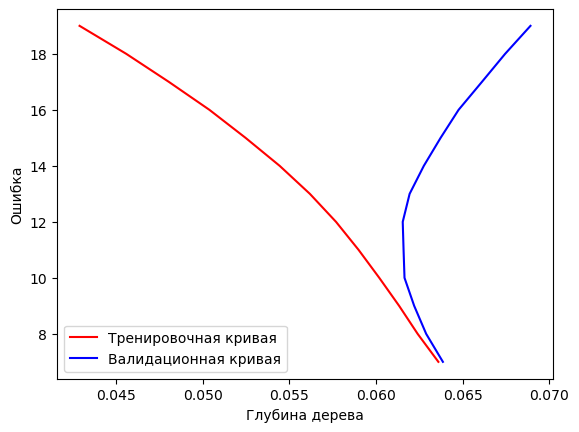

In [119]:
plt.plot(train_rmsle_preds, max_depths, color='red', label='Тренировочная кривая')
plt.plot(valid_rmsle_preds, max_depths, color='blue', label='Валидационная кривая')
plt.xlabel('Глубина дерева')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [120]:
# ваш код здесь
# Создаем и обучаем модель случайного леса деревьев
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    criterion='squared_error',
    min_samples_split=20,
    random_state=42
)
rfr.fit(X_train_df, y_train_log)
y_valid_log_predict = rfr.predict(X_valid_df)

In [121]:
# Рассчитываем RMSLE
rmsle_train = np.sqrt(mean_squared_log_error(y_train_log, y_train_log_pred))
rmsle_valid = np.sqrt(mean_squared_log_error(y_valid_log, y_valid_log_pred))

# Округляем результаты до сотых
rmsle_train = round(rmsle_train, 2)
rmsle_valid = round(rmsle_valid, 2)

print("RMSLE на тренировочной выборке:", rmsle_train)
print("RMSLE на валидационной выборке:", rmsle_valid)

RMSLE на тренировочной выборке: 0.04
RMSLE на валидационной выборке: 0.07


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [122]:
# ваш код здесь
# Создаем и обучаем модель градиентного бустинга
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6, 
    min_samples_split=30,
    random_state=42
)
gbr.fit(X_train_df, y_train_log)
y_valid_log_predict = gbr.predict(X_valid_df)

In [123]:
# Рассчитываем RMSLE
rmsle_train = np.sqrt(mean_squared_log_error(y_train_log, y_train_log_pred))
rmsle_valid = np.sqrt(mean_squared_log_error(y_valid_log, y_valid_log_pred))

# Округляем результаты до сотых
rmsle_train = round(rmsle_train, 2)
rmsle_valid = round(rmsle_valid, 2)

print("RMSLE на тренировочной выборке:", rmsle_train)
print("RMSLE на валидационной выборке:", rmsle_valid)

RMSLE на тренировочной выборке: 0.04
RMSLE на валидационной выборке: 0.07


In [124]:
range = gbr

### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


In [125]:
import matplotlib.pyplot as plt
feature_importances_gbr = gbr.feature_importances_
feature_names = X_train_df.columns.tolist()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


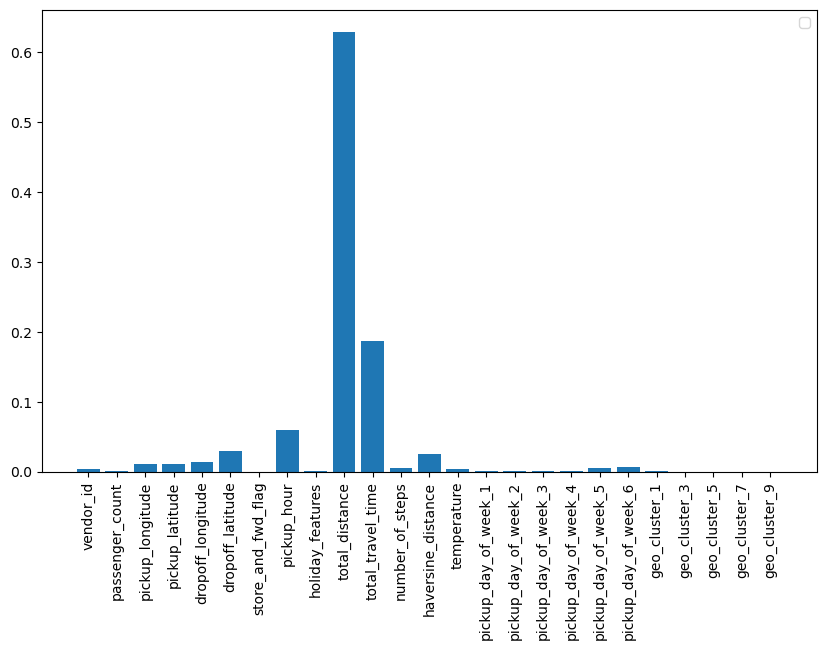

In [126]:
import matplotlib.pyplot as plt
feature_importances_gbr = gbr.feature_importances_
feature_names = X_train_df.columns.tolist()

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances_gbr)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [181]:
# best_features = ['total_distance', 'total_travel_time', 'pickup_hour']

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [182]:
# ваш код здесь
from sklearn.metrics import median_absolute_error
import math

error_in_seconds = median_absolute_error(
    np.exp(y_valid_log) - 1,
    np.exp(y_valid_log_predict) - 1
)
round(error_in_seconds / 60, 1)

1.8

Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [190]:
test_data = pd.read_csv("data/test.csv")
osrm_data_test = pd.read_csv("data/osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [191]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

one_hot_encoder = OneHotEncoder()

test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[found_columns]

scaler = MinMaxScaler()
scaler.fit(X_test)

X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

/var/folders/g6/7y9xp5yn3xsf02lhwc_7bjqc0000gn/T/ipykernel_53734/2591823555.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data['holiday_features'][i] = 1
/Users/daniilpereverzev/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Shape of data: (625134, 25)


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [203]:
# ваш код здесь
y_test_predict = gbr.predict(X_test_scaled)
y_test_predict = np.exp(y_test_predict) - 1
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/submission_mio.csv', index=False)

/Users/daniilpereverzev/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [194]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.1 kB/s eta 0:00:0000:0100:01m


После чего модуль можно импортировать:

In [195]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [199]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_new_scaled, label=y_train_log, feature_names=found_columns)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=found_columns)
dtest = xgb.DMatrix(X_test_scaled, feature_names=found_columns)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [200]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

[0]	train-rmse:5.42218	valid-rmse:5.42190
[10]	train-rmse:1.93551	valid-rmse:1.93540
[20]	train-rmse:0.78578	valid-rmse:0.78657
[30]	train-rmse:0.47960	valid-rmse:0.48157
[40]	train-rmse:0.42165	valid-rmse:0.42428
[50]	train-rmse:0.40946	valid-rmse:0.41250
[60]	train-rmse:0.40477	valid-rmse:0.40823
[70]	train-rmse:0.40100	valid-rmse:0.40480
[80]	train-rmse:0.39879	valid-rmse:0.40290
[90]	train-rmse:0.39745	valid-rmse:0.40183
[100]	train-rmse:0.39615	valid-rmse:0.40079
[110]	train-rmse:0.39439	valid-rmse:0.39932
[120]	train-rmse:0.39321	valid-rmse:0.39844
[130]	train-rmse:0.39221	valid-rmse:0.39766
[140]	train-rmse:0.39114	valid-rmse:0.39711
[150]	train-rmse:0.39004	valid-rmse:0.39637
[160]	train-rmse:0.38907	valid-rmse:0.39561
[170]	train-rmse:0.38811	valid-rmse:0.39495
[180]	train-rmse:0.38730	valid-rmse:0.39440
[190]	train-rmse:0.38671	valid-rmse:0.39420
[200]	train-rmse:0.38596	valid-rmse:0.39384
[210]	train-rmse:0.38515	valid-rmse:0.39346
[220]	train-rmse:0.38420	valid-rmse:0.39292

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [201]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.39119


Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

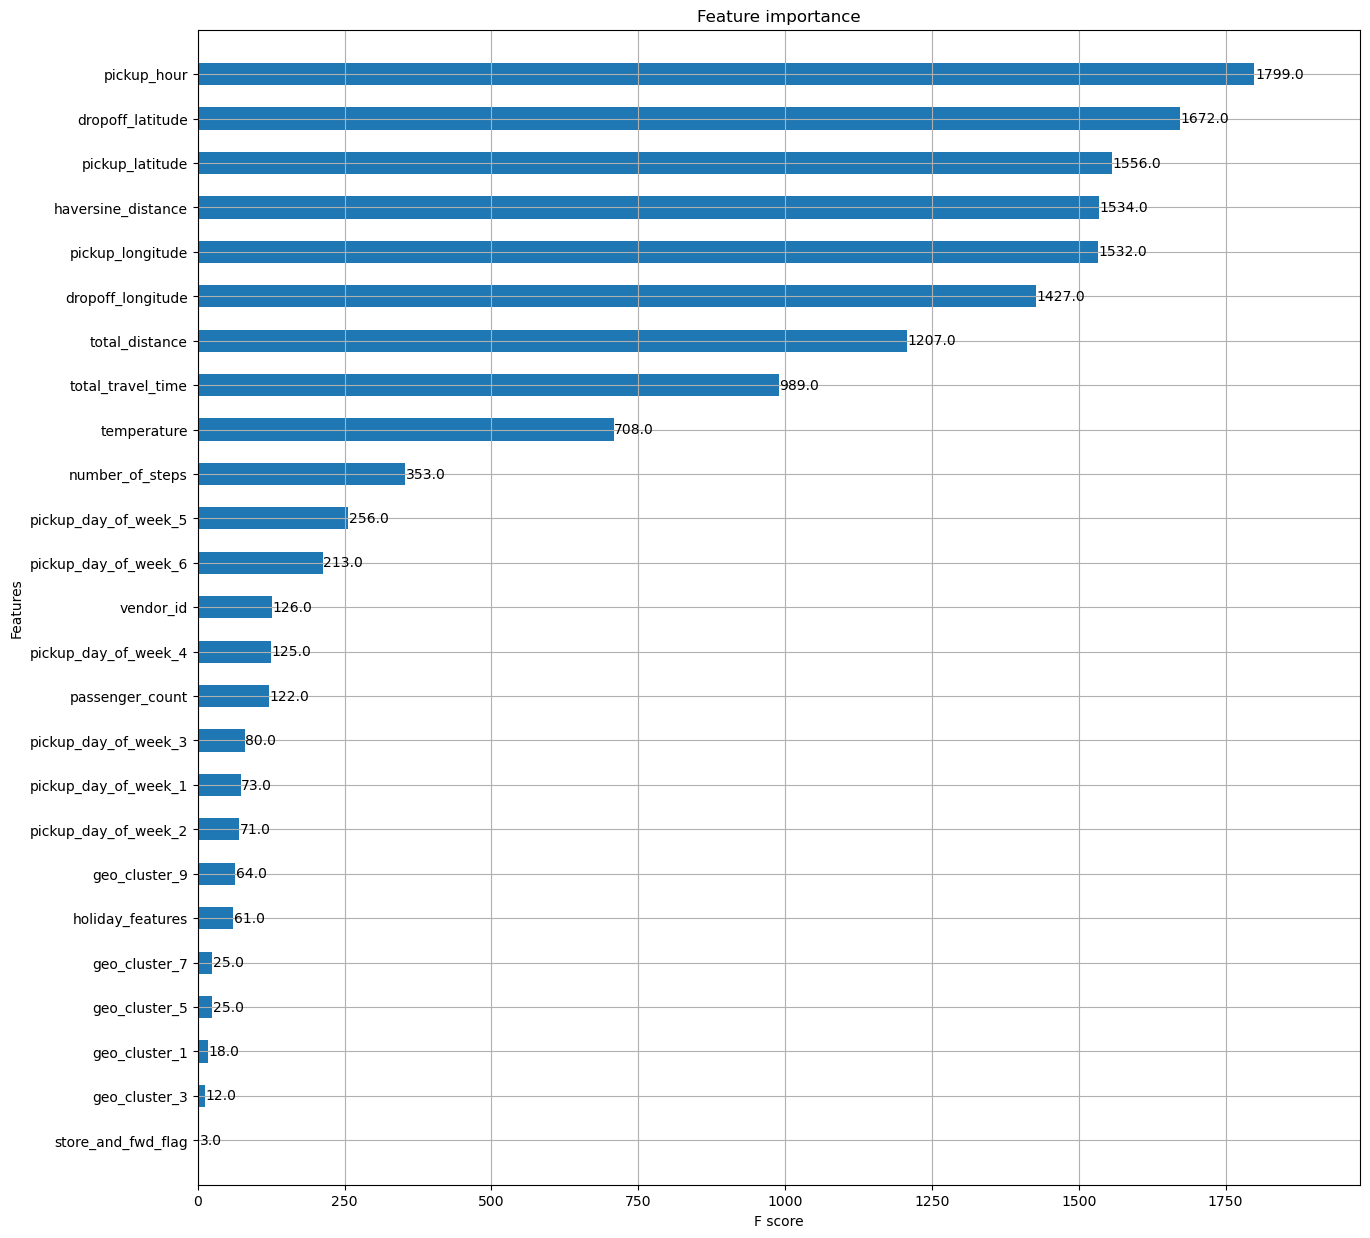

In [202]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)